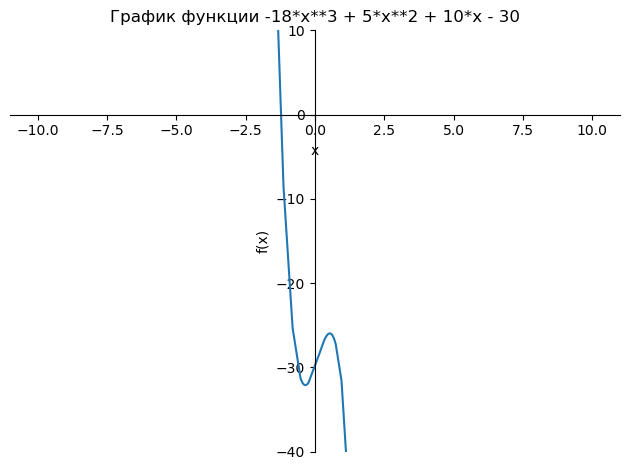

In [47]:
from sympy import *
from sympy.plotting import plot
from sympy import *
x=Symbol('x')
f=-18 * x ** 3 + 5 * x ** 2 + 10 * x - 30
# f= 2 * x ** 3 + 2 * x ** 2 - 18 * x - 18
# f=(x ** 2 + 3) / (3 * (x + 1))
p=plot(f,title=f'График функции {f}', axis_center=(0,0),ylim=(-40,10), )
# xlim=(-30,30)
#  (x, -10, 10), (y, -10, 10)
# p.save('plot.png')



### **1. Определение корней функции**

In [48]:
u=solveset(f,x, Reals)
if len(u)==0:
  print("Действительных корней нет")
else:
  for i in u:
    print(i.evalf(), end="\n")


-1.24457983246689


### **2. Интервалы возрастания и убывания функции**

In [52]:

d1=diff(f)
print(f"первая произодная функции {f}:", d1)
d1_root = solveset(d1,x)
print("корни производной:", d1_root)
interval_d1_root=[-oo,*solveset(d1,x),oo]
print("интервалы призводной:", interval_d1_root)

incr_list = []
decr_list = []

for i in range(1, len(interval_d1_root)):
    val = is_increasing(f, Interval.open(interval_d1_root[i - 1], interval_d1_root[i]))
    if val:
        incr_list.append(f"[{interval_d1_root[i - 1].evalf(2)}, {interval_d1_root[i].evalf(2)}]")
    else:
        decr_list.append(f"[{interval_d1_root[i - 1].evalf(2)}, {interval_d1_root[i].evalf(2)}]")

print(f"\nИнтервалы возрастания и убывания функции {f}:")
print(f"Убывает на интервалах:", *decr_list, sep="\n")
print(f"Возрастает на интервалах:", *incr_list, sep="\n")


первая произодная функции -18*x**3 + 5*x**2 + 10*x - 30: -54*x**2 + 10*x + 10
корни производной: {5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54}
интервалы призводной: [-oo, 5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54, oo]

Интервалы возрастания и убывания функции -18*x**3 + 5*x**2 + 10*x - 30:
Убывает на интервалах:
[-oo, -0.35]
[0.53, oo]
Возрастает на интервалах:
[-0.35, 0.53]


### **3. Экстремумы функции**

In [56]:

d1=diff(f)
print(f"первая произодная функции {f}:", d1)
d1_root = sorted(solveset(d1,x, Reals))
print("корни производной:", d1_root)
interval_d1_root=[-oo,*d1_root,oo]
print("интервалы призводной:", interval_d1_root)


max_list = []
min_list = []
middle_list = []
if len(interval_d1_root)>2:
    for i in range(1, len(interval_d1_root)-1):
        val_1 = is_increasing(f, Interval.open(interval_d1_root[i - 1], interval_d1_root[i]))
        val_2 = is_increasing(f, Interval.open(interval_d1_root[i], interval_d1_root[i+1]))

        if val_1 ==True and val_2 ==False:
            max_list.append(f"[{interval_d1_root[i].evalf(2)}, {f.subs(x, interval_d1_root[i]).evalf(2)}]")
        elif  val_1 ==False and val_2 ==True:
             min_list.append(f"[{interval_d1_root[i].evalf(2)},  {f.subs(x, interval_d1_root[i]).evalf(2)}]")
        else:
           middle_list.append(f"[{interval_d1_root[i]}]")
    print(f"\nЭкстремумы функции {f}:")
    print(f"Локальные максимумы:", *max_list, sep="\n")
    print(f"Локальные минимумы:", *min_list, sep="\n")
    print(f"Точки перегиба:", *middle_list, sep="\n")
else:
    print("функция не имеет экстремумов")


первая произодная функции -18*x**3 + 5*x**2 + 10*x - 30: -54*x**2 + 10*x + 10
корни производной: [5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54]
интервалы призводной: [-oo, 5/54 - sqrt(565)/54, 5/54 + sqrt(565)/54, oo]

Экстремумы функции -18*x**3 + 5*x**2 + 10*x - 30:
Локальные максимумы:
[0.53, -26]
Локальные минимумы:
[-0.35,  -32]
Точки перегиба:


### **4.  Интервалы знакопостоянства функции**

In [67]:
interval_roots = [-oo, oo]
f_roots_ = (solveset(f, x, Reals))
f_roots = []
[f_roots.append(i) for i in f_roots_]



if len(f_roots) == 0:
  print("Действительных корней нет")
  f_roots = []
else:
  print(f"корни функции {f}:")
  for i in u:
    print(i.evalf(3), end="\n")  


# Точки разрыва:
f_str=str(f)
fraction_pos  = f_str.find("/")
if fraction_pos ==  -1:
    print("Точек разрыва нет")
    f_break_points = []
else:
    f_str = f_str[fraction_pos+1:]
    print(f"знаменатель функции {f}-  ",  f_str)
    f_fraction  = sympify(f_str)
    print(f_fraction.subs(x, x))
    r = solve(f_fraction)
    if len(r) == 0:
        print("Точек разрыва нет")
        f_break_points = []
    else:
        print('точки разрыва функции', r)
        f_break_points = [i for i in r]


interval_roots[1:1] = sorted(f_roots + f_break_points)
print("интервалы функции ", interval_roots)

pozitive_list = []
negative_list = []

for i in range(1, len(interval_roots)):
    num_1, num_2 = interval_roots[i - 1], interval_roots[i]
   
    num_1 =  interval_roots[1]-10 if i == 1 else num_1
    num_2 = interval_roots[-2]+10 if i == len(interval_roots)-1 else num_2

    val = f.subs(x,num_2-(num_2-num_1)/2)

    num_1 = interval_roots[0] if num_1<interval_roots[1] else num_1
    num_2 = interval_roots[-1] if num_2>interval_roots[-2] else num_2
    
    if val<0:
        in_i = "(" if num_1 in f_break_points  else "["
        out_i =  ")" if num_2 in f_break_points  else "]"
        negative_list.append(f"{in_i}{num_1.evalf(3)}, {num_2.evalf(3)}{out_i}") 
    else:
        in_i = "(" if num_1 in f_break_points  else "["
        out_i =  ")" if num_2 in f_break_points  else "]"
        pozitive_list.append(f"{in_i}{num_1.evalf(3)}, {num_2.evalf(3)}{out_i}") 

print("f > 0:", *pozitive_list, sep="\n")
print("\nf < 0:", *negative_list, sep="\n")

корни функции -18*x**3 + 5*x**2 + 10*x - 30:
-1.24
Точек разрыва нет
интервалы функции  [-oo, -(5*sqrt(218931)/108 + 127045/5832)**(1/3)/3 - 565/(972*(5*sqrt(218931)/108 + 127045/5832)**(1/3)) + 5/54, oo]
f > 0:
[-oo, -1.24]

f < 0:
[-1.24, oo]
